Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


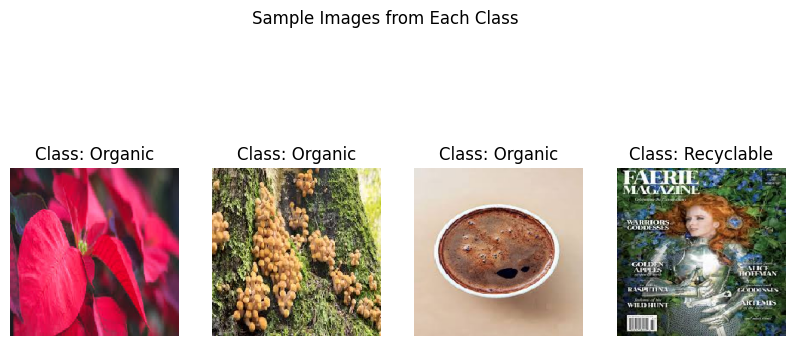

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
# Set up directories (update these paths to match your local file system)
base_dir = r"C:/Users/rugwe/Downloads/archive (2)/DATASET/DATASET"# Replace with your actual path
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [2]:
#include_top=False: Excludes the fully connected layers at the top of MobileNetV2
#weights='imagenet': Uses pre-trained weights from the ImageNet dataset
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezes all the layers in the pre-trained MobileNetV2 to ensures that only the custom layers willlearn from new data
mobilenet_model.trainable = False  

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(), #reduces the spatial dimensions of single vector(summation of matrix)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R.

In [3]:
history = model.fit(train_data,validation_data=test_data, epochs=5)
model.save('Waste_Sorting_Model.h5')
loss,accuracy = model.evaluate(test_data)
print("Model Accuracy",accuracy)

Epoch 1/5


C:\Users\rugwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 263s 369ms/step - accuracy: 0.8765 - loss: 0.2929 - val_accuracy: 0.9037 - val_loss: 0.2326
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 176s 250ms/step - accuracy: 0.9304 - loss: 0.1799 - val_accuracy: 0.9057 - val_loss: 0.2275
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 159s 225ms/step - accuracy: 0.9371 - loss: 0.1661 - val_accuracy: 0.8934 - val_loss: 0.2516
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 187s 266ms/step - accuracy: 0.9418 - loss: 0.1530 - val_accuracy: 0.8715 - val_loss: 0.2979
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 208s 294ms/step - accuracy: 0.9479 - loss: 0.1448 - val_accuracy: 0.8464 - val_loss: 0.3586


79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.8526 - loss: 0.3586
Model Accuracy 0.8463987112045288
